In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Pre-analysis

In [4]:
df = pd.read_csv('../../Data/training_data.csv')

C:\Users\CrazE\AppData\Local\Temp\ipykernel_6396\626279252.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../Data/training_data.csv')


In [5]:
features = pd.read_table('description.md', sep="|", header=0, skipinitialspace=True).dropna(axis=1, how='all').iloc[1:].reset_index().drop(columns="index")
features["Field Name"] = features["Field Name"].str.strip()
missing = (df.isna().mean().round(4) * 100).to_frame("Missing %").reset_index().rename(columns={"index": "Field Name"})
unique = df.nunique().to_frame("Unique").reset_index().rename(columns={"index": "Field Name"})
features = features.merge(missing, on="Field Name", how="left")
features = features.merge(unique, on="Field Name", how="left")
features

,Field Name,Description,Missing %,Unique
0,Customer,Customer identifier ...,0.00,2448
1,clli,OLT CLLI. Access layer. ...,0.00,1015
2,year,Year of the measurement ...,0.00,1
3,month,Month of the measurement ...,0.00,1
4,day,Day of the measurement ...,0.00,31
5,date,Date of the measurement ...,0.00,31
6,rack,Rack of the OLT ...,0.00,1
7,shelf,Shelf of the OLT ...,0.00,1
8,slot,Slot of the OLT ...,0.00,18
9,port,PON Port of the OLT ...,0.00,16


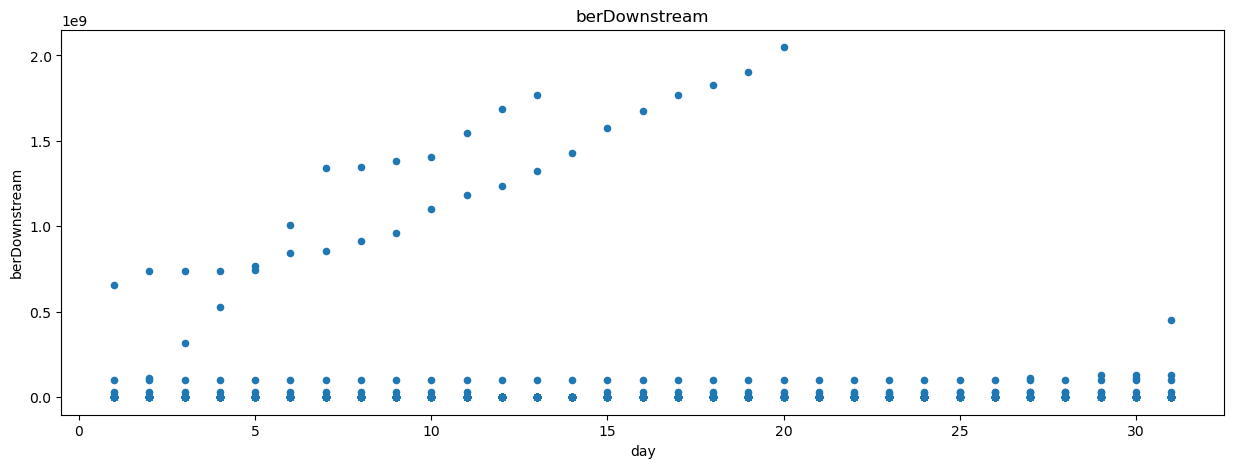

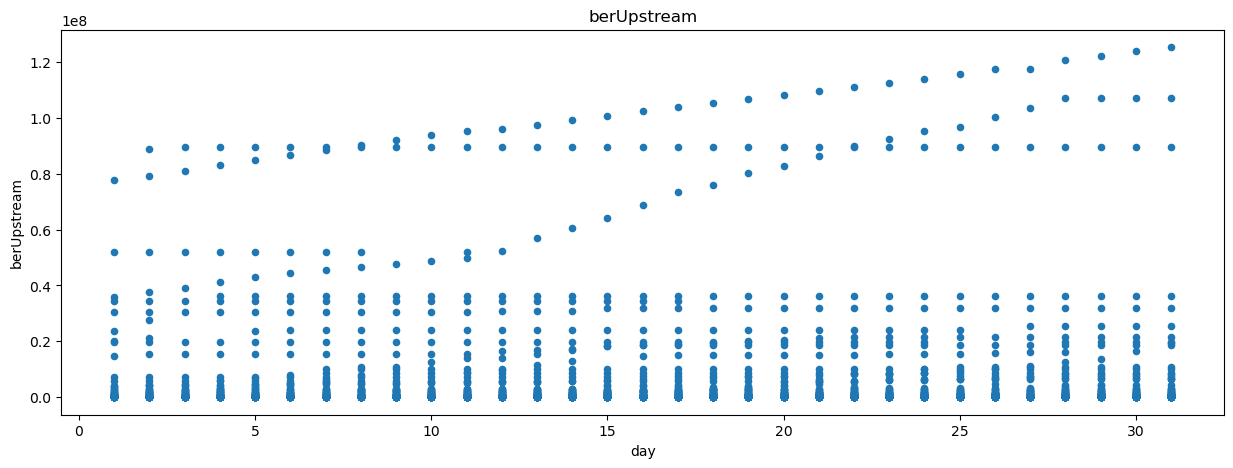

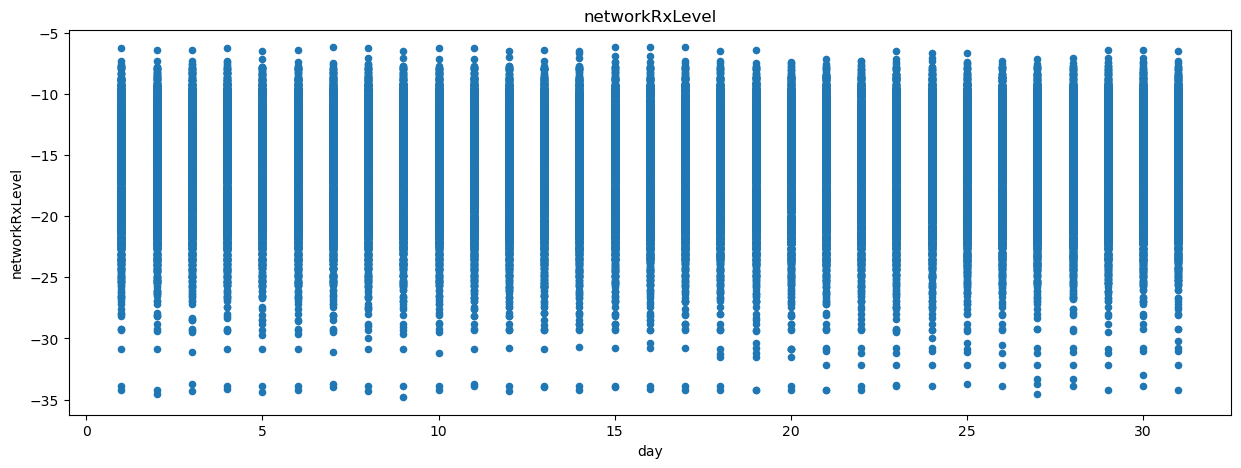

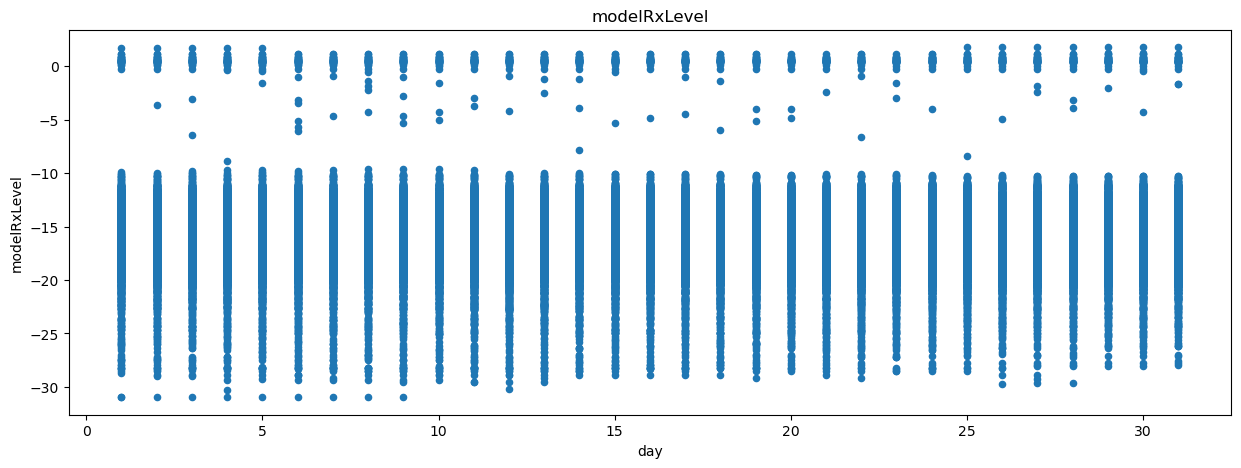

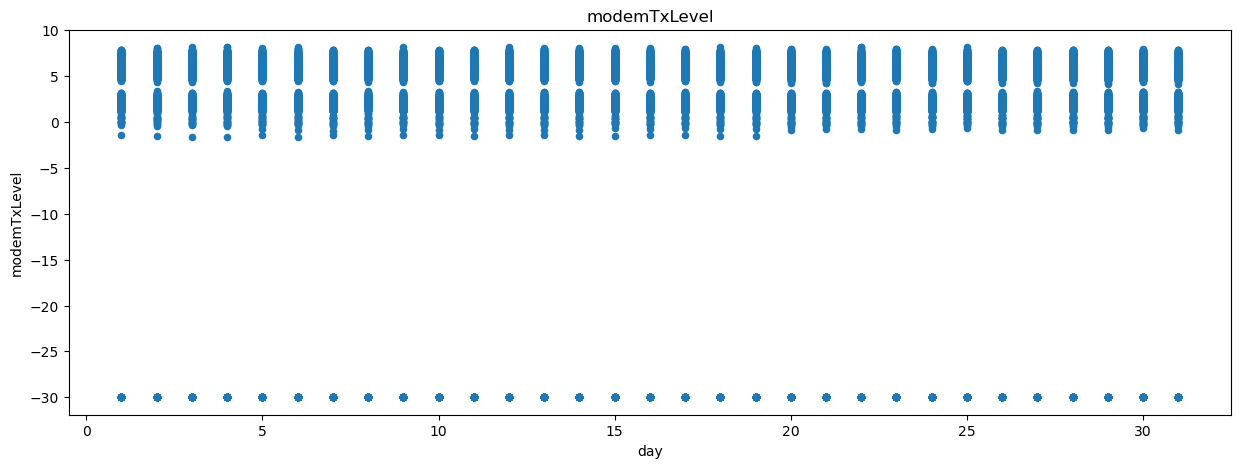

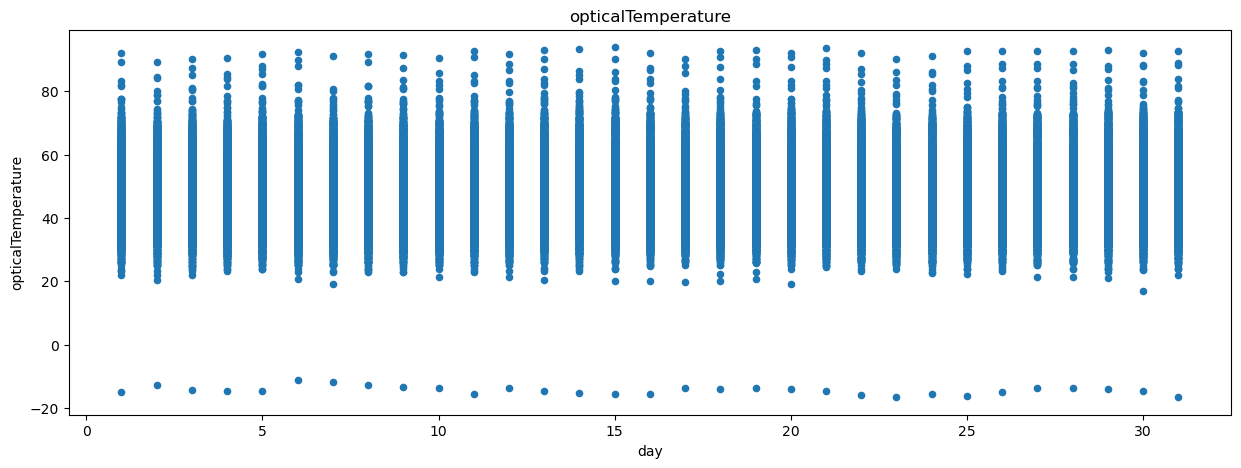

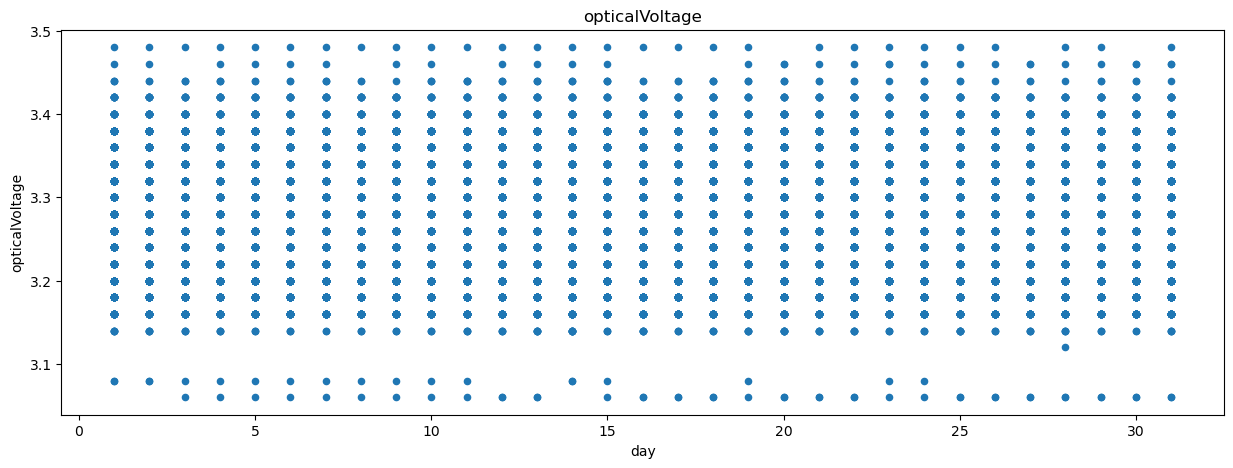

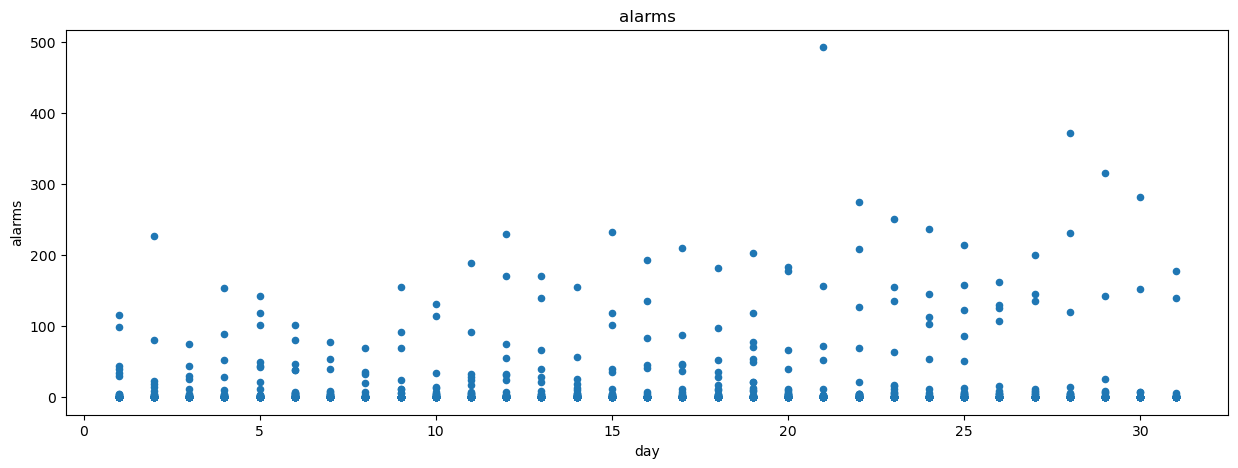

In [282]:
plotColumns = ["berDownstream", "berUpstream", "networkRxLevel", "modelRxLevel", "modemTxLevel", "opticalTemperature", "opticalVoltage", "alarms", "service_repair"]
# Create scatter plot for all columns with x the "day" column and y as the column name, where the column name is not "day" or "service_repair" or "Customer"
for column in plotColumns:
    if column != "day" and column != "service_repair" and column != "Customer":
        df.plot.scatter(x="day", y=column, figsize=(15,5), title=column)
        plt.show()

<Axes: title={'center': 'service_repair'}, xlabel='day', ylabel='service_repair'>

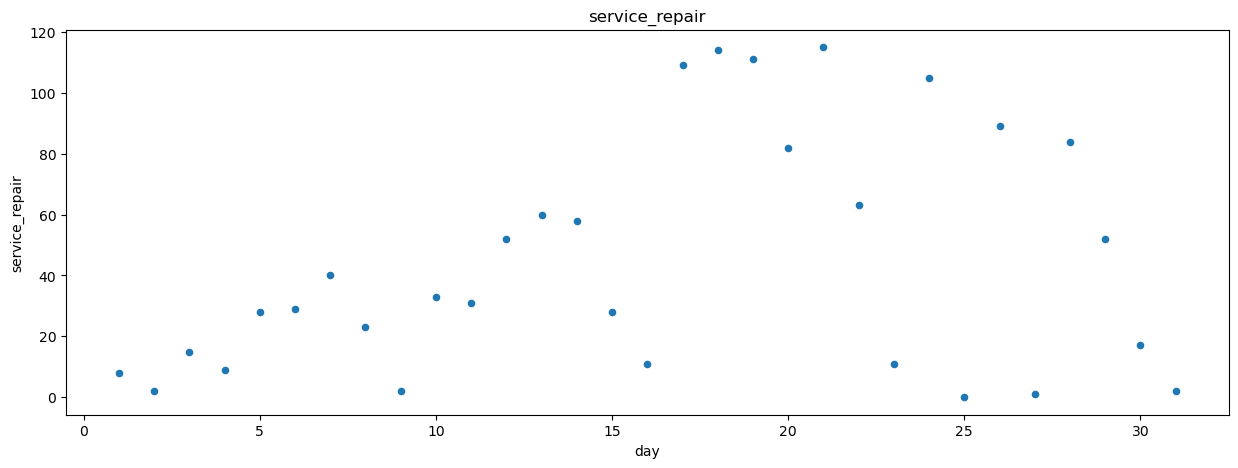

In [283]:
service_day = df[['day', 'service_repair']].groupby(['day']).sum()['service_repair'].reset_index()
service_day.plot.scatter(x="day", y="service_repair", figsize=(15,5), title="service_repair")

# Reprocessing

In [256]:
# Drop some data that is unnecessary or has one unique value
df = df.drop(['clli', 'year', 'month', 'date', 'rack', 'shelf', 'objectType', 'Stops_null', 'Stops_NAS-Error', 'Stops_Port-Error', 'Stops_Service-Unavailable', 'Stops_User-Error'], axis=1)
# Drop some data that has too many null values ( > 60000)
df = df.drop(['Stops_Admin-Reset', 'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service', 'Stops_NAS-Request', 'Stops_Session-Timeout', 'Stops_User-Request', 'INTENT', 'CALLCOMPLETIONREASON', 'TSO_calls_count', 'REPORT_DATE'], axis=1)
# Drop some data that has too many null values ( > 50000)
df = df.drop(['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel'], axis=1)
# Drop some data that may be too hard to work with (for example: low unique)
df = df.drop(['modemType', 'laserBiasThreshold', 'status', 'ranged', 'videoAniAgcModePlanned', 'videoAniOperState', 'score'], axis=1)
df['berDownstream'] = df['berDownstream'].fillna(df['berDownstream'].median())
df['berUpstream'] = df['berUpstream'].fillna(df['berUpstream'].median())
df['networkRxLevel'] = df['networkRxLevel'].fillna(df['networkRxLevel'].median())
df['modemTxLevel'] = df['modemTxLevel'].fillna(df['modemTxLevel'].median())
df['distance'] = df['distance'].fillna(df['distance'].median())
df['laserBiasCurrent'] = pd.to_numeric(df['laserBiasCurrent'],errors = 'coerce')
df['laserBiasCurrent'] = df['laserBiasCurrent'].fillna(df['laserBiasCurrent'].median())
df['opticalTemperature'] = df['opticalTemperature'].fillna(df['opticalTemperature'].median())
df['service_repair'] = df['service_repair'].fillna(0)

# One hot encoding
labelencoder = LabelEncoder()
df['speedProfile'] = labelencoder.fit_transform(df['speedProfile'])
df['objectName'] = labelencoder.fit_transform(df['objectName'])

## Feature Selection

In [257]:
features = ['berDownstream', 'berUpstream', 'networkRxLevel', 'modemTxLevel', 'distance']
numInputs = len(features)

## Training the Deep Learning Model

In [258]:
X = df[features]
Y = df['service_repair']

Scale data

In [259]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.00000000e+00, 8.56614493e-06, 6.81818182e-01, 0.00000000e+00,
        3.09278351e-02],
       [0.00000000e+00, 1.19750395e-07, 6.81818182e-01, 8.39010586e-01,
        5.15463918e-02],
       [0.00000000e+00, 5.98751976e-07, 6.81818182e-01, 8.53002830e-01,
        2.06185567e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.12587413e-01, 9.44974321e-01,
        1.23711340e-01],
       [0.00000000e+00, 0.00000000e+00, 7.69230769e-01, 9.68661566e-01,
        3.53951890e-01],
       [0.00000000e+00, 0.00000000e+00, 6.81818182e-01, 9.62110890e-01,
        1.75257732e-01]])

Split data into testing and validation

In [260]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [261]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(44152, 5) (9461, 5) (9462, 5) (44152,) (9461,) (9462,)


In [262]:
from keras.models import Sequential
from keras.layers import Dense

Set up layers

In [263]:
from keras.layers import Dropout
from keras import regularizers

In [264]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(numInputs,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [265]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model

In [266]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=5,
          validation_data=(X_val, Y_val))

Epoch 1/5


1380/1380 [==============================] - 3s 2ms/step - loss: 0.1411 - accuracy: 0.9782 - val_loss: 0.1064 - val_accuracy: 0.9782
Epoch 2/5
1380/1380 [==============================] - 3s 2ms/step - loss: 0.1063 - accuracy: 0.9782 - val_loss: 0.1062 - val_accuracy: 0.9782
Epoch 3/5
1380/1380 [==============================] - 5s 4ms/step - loss: 0.1061 - accuracy: 0.9782 - val_loss: 0.1060 - val_accuracy: 0.9782
Epoch 4/5
1380/1380 [==============================] - 5s 3ms/step - loss: 0.1059 - accuracy: 0.9782 - val_loss: 0.1059 - val_accuracy: 0.9782
Epoch 5/5
1380/1380 [==============================] - 6s 4ms/step - loss: 0.1058 - accuracy: 0.9782 - val_loss: 0.1058 - val_accuracy: 0.9782


## Evaluate Model

In [267]:
model.evaluate(X_test, Y_test)[1]

296/296 [==============================] - 1s 4ms/step - loss: 0.1093 - accuracy: 0.9772


0.9771718382835388

296/296 [==============================] - 0s 946us/step


<Axes: >

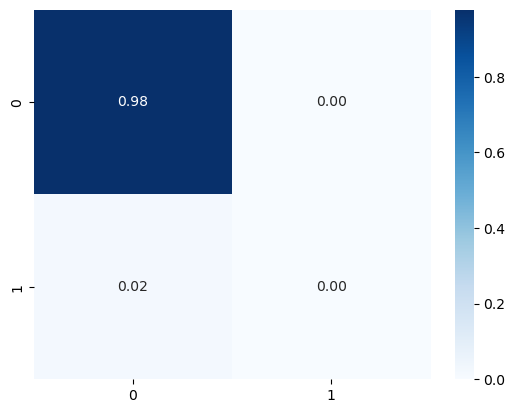

In [280]:
from sklearn.metrics import confusion_matrix
y_prediction = model.predict(X_test).round()
result = confusion_matrix(Y_test, y_prediction, normalize='pred')
sns.heatmap(result, annot=True, fmt='.2f', cmap='Blues')

This is a clear sign that our model need some work!!!

In [268]:
import matplotlib.pyplot as plt

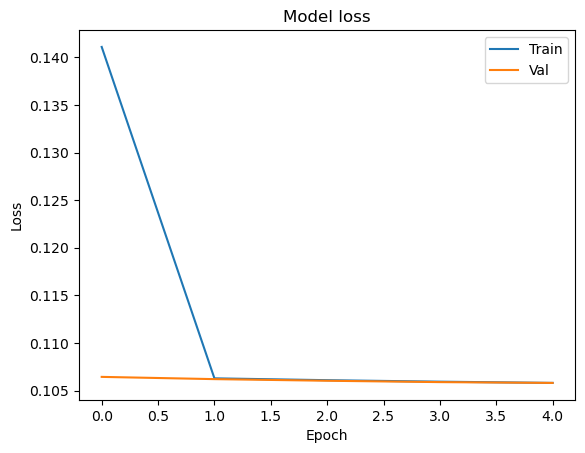

In [269]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

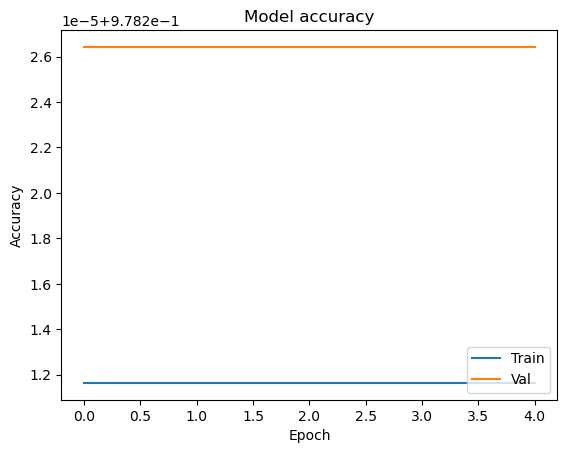

In [270]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Predict the Test Data Using Our Model

In [271]:
df2 = pd.read_csv('../../Data/test_data.csv')
df3 = pd.read_csv('../../Data/customers_ToBePredicted.csv')
# Drop some data that is unnecessary or has one unique value
df2 = df2.drop(['clli', 'year', 'month', 'date', 'rack', 'shelf', 'objectType', 'Stops_null', 'Stops_NAS-Error', 'Stops_Port-Error', 'Stops_Service-Unavailable', 'Stops_User-Error'], axis=1)
# Drop some data that has too many null values ( > 60000)
df2 = df2.drop(['Stops_Admin-Reset', 'Stops_Idle-Timeout', 'Stops_Lost-Carrier', 'Stops_Lost-Service', 'Stops_NAS-Request', 'Stops_Session-Timeout', 'Stops_User-Request', 'INTENT', 'CALLCOMPLETIONREASON', 'TSO_calls_count', 'REPORT_DATE'], axis=1)
# Drop some data that has too many null values ( > 50000)
df2 = df2.drop(['videoAniAgcSetting', 'videoAniOpInfoOpticalSignalLevel', 'videoAniOpInfoOpticalSignalLevelDbm', 'videoAniOpInfoRfPowerLevel'], axis=1)
# Drop some data that may be too hard to work with (for example: low unique)
df2 = df2.drop(['modemType', 'laserBiasThreshold', 'status', 'ranged', 'videoAniAgcModePlanned', 'videoAniOperState', 'score'], axis=1)
df2['berDownstream'] = df2['berDownstream'].fillna(df2['berDownstream'].median())
df2['berUpstream'] = df2['berUpstream'].fillna(df2['berUpstream'].median())
df2['networkRxLevel'] = df2['networkRxLevel'].fillna(df2['networkRxLevel'].median())
df2['modemTxLevel'] = df2['modemTxLevel'].fillna(df2['modemTxLevel'].median())
df2['distance'] = df2['distance'].fillna(df2['distance'].median())
df2['laserBiasCurrent'] = pd.to_numeric(df2['laserBiasCurrent'],errors = 'coerce')
df2['laserBiasCurrent'] = df2['laserBiasCurrent'].fillna(df['laserBiasCurrent'].median())
df2['opticalTemperature'] = df2['opticalTemperature'].fillna(df['opticalTemperature'].median())
#df2['service_repair'] = df2['service_repair'].fillna(0)

# One hot encoding
labelencoder = LabelEncoder()
df2['speedProfile'] = labelencoder.fit_transform(df2['speedProfile'])
df2['objectName'] = labelencoder.fit_transform(df2['objectName'])

In [272]:
features

['berDownstream', 'berUpstream', 'networkRxLevel', 'modemTxLevel', 'distance']

In [277]:
import warnings
warnings.filterwarnings('ignore')
import csv
with open("answer2.csv", "w", newline='') as csvfile:
  csvwriter = csv.writer(csvfile, delimiter=',')
  csvwriter.writerow(['Customer', 'service_repair'])
  for i in range(len(df3)-1):
        customerID = int(df3.iloc[[i]].iloc[:,0])
        x_test = df2.loc[customerID == df2['Customer']]
        x_test = x_test[features]
        prediction = model.predict(x_test)
        to_write = int(prediction.max().round())
        csvwriter.writerow([customerID, to_write])


1/1 [==============================] - 0s 32ms/step


In [274]:
model.save("model2.keras")
